In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
\

In [2]:
retail_data=pd.read_csv("data.csv",encoding='cp1252')

In [3]:
df=pd.DataFrame(data=retail_data)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
country_cust=df[["Country","CustomerID"]].drop_duplicates()

In [8]:
country_cust.groupby(["Country"])["CustomerID"].aggregate('count').reset_index().sort_values("CustomerID",ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df=df[pd.notnull(df["CustomerID"])]

In [11]:
df.shape

(406829, 8)

In [12]:
df=df[(df["Quantity"]>0)]

In [13]:
df=df[(df["UnitPrice"]>0)]

In [14]:
df.shape

(397884, 8)

In [15]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [16]:
df["TotalAmount"]=df["Quantity"]*df["UnitPrice"]

In [17]:
df.shape

(397884, 9)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)


In [20]:
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

In [21]:
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [22]:
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [23]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


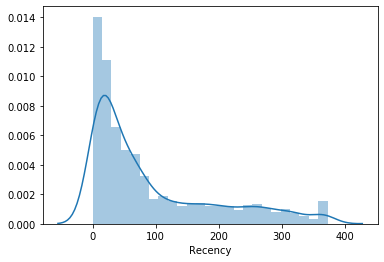

In [24]:
x = RFMScores['Recency']

ax = sns.distplot(x)

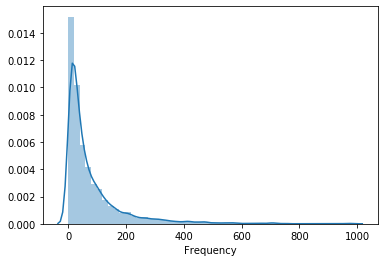

In [25]:
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

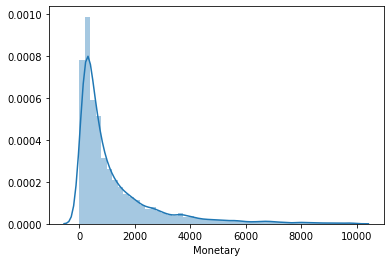

In [26]:
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [27]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [28]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [29]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [30]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

In [31]:
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [32]:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [33]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum


In [34]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [35]:
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

In [36]:
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

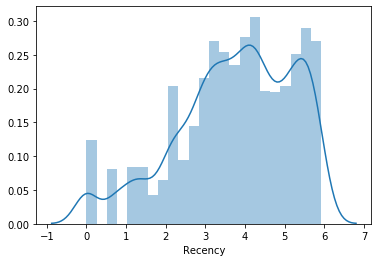

In [37]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

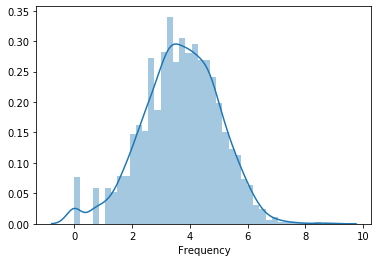

In [38]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

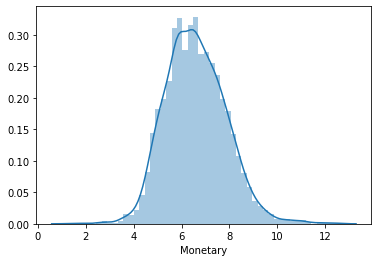

In [39]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_Data = sc.fit_transform(Log_Tfd_Data)

In [41]:
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [42]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_

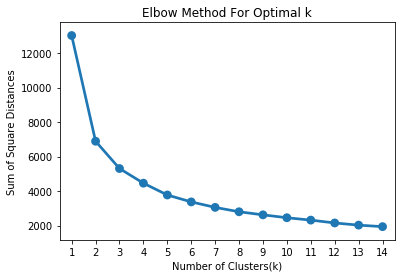

In [43]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,2
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2
12350.0,310,17,334.40,4,4,3,443,11,Bronze,0


<Figure size 504x504 with 0 Axes>

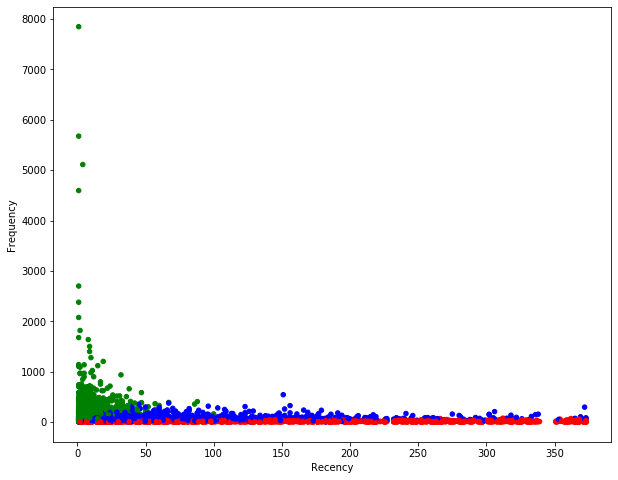

In [46]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [48]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,1,green
12348.0,75,31,1797.24,3,3,1,331,7,Gold,2,blue
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2,blue
12350.0,310,17,334.40,4,4,3,443,11,Bronze,0,red


In [79]:
y=RFMScores.loc[:,['RFM_Loyalty_Level']]

y.reset_index()
y.shape
y['RFM_Loyalty_Level_list']=y.RFM_Loyalty_Level.map({"Platinum":1,"Gold":2,"Silver":3,"Bronze":4})
y=y.drop(["RFM_Loyalty_Level"],axis=1).values
y.shape





(4338, 1)

In [ ]:
RFMScores.head()

In [80]:
x=RFMScores.loc[:,["Recency","Frequency","Monetary"]].values

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.18,random_state=42)

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3557, 3)
(781, 3)
(3557, 1)
(781, 1)


In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
import warnings
warnings.filterwarnings("ignore")

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, )
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))

    

    


Accuracy in percent =  99.35979513444302
0.9931926825768337
0.9935979513444302
0.9935942207370598


In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))


Accuracy in percent =  99.35979513444302
0.9931926825768337
0.9935979513444302
0.9935942207370598


In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print(lr.score(x_train,y_train))
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))


0.7703120607253303
0.9931926825768337
0.9935979513444302
0.9935942207370598


In [108]:
def rfc():
    rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, )
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    print('Accuracy in percent = ',score(pred, y_test)*100)
    print(f1_score(y_test, pred, average='macro'))
    print(f1_score(y_test, pred, average='micro'))
    print(f1_score(y_test, pred, average='weighted'))
    

In [110]:
from sklearn.externals import joblib
joblib.dump(rfc,"rfcsave")

['rfcsave']

In [111]:
import pickle
s=pickle.dumps(rfc)
clf2=pickle.loads(s)

In [112]:
clf2

<function __main__.rfc()>